In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" 
import numpy as np
import pandas as pd
import csv
import bqplot
import collections
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
dobs = []
z = 1880

for i in range(139):
    if z <=2018:
        f = open('yob%s.txt' % z, 'r')
        text = f.readlines()
        f.close()
        for line in text:
            line = line.replace("\n", "")
            line = line+','+str(z)
            dobs.append(line)
        z = z+1
            
#dobs

In [99]:
column_names = ["Name", "Sex", 'Count', "Year"]
catstart = ["Caterin,", "Caterine,", "Catharine,", "Catheren,","Catherene,","Catherin,","Catherine,",
            "Catherne,","Catheryn,","Catheryne,","Cathirine,","Cathreen,","Cathren,","Cathrin,","Cathrine,",
            "Cathryn,","Cathryne,","Cathrynn,","Cathyrn,","Catrin,","Katerin,","Katerine,","Katerinne,",
            "Kateryn,","Katharin,","Katharine,","Katharyn,", "Katharyne,","Katheran,","Katheren,","Katherene,",
            "Katheriene,","Katherin,","Katherine,","Katherinne,","Katherne,","Katheryn,","Katheryne,",
            "Katherynn,","Kathran,","Kathrean,","Kathreen,","Kathren,","Kathrene,","Kathrin,","Kathrine,",
            "Kathryn,","Kathryne,","Kathrynn,","Kathrynne,","Kathyren,","Kathyrine,","Kathyrn,", "Kitty,"]
namespell = []
for name in catstart:
    for line in dobs:
        if str(name) in str(line):
            namespell.append(line)
catlist = []
for line in namespell:
    line = str(line)
    words = line.split(',')
    catlist.append(words)
catname = pd.DataFrame(catlist, columns = column_names)

catname["Year"]= pd.to_numeric(catname["Year"])
catname["Count"]= pd.to_numeric(catname["Count"])

#catname

In [100]:
#len(catstart)

In [101]:
# built this to see what I was working with; never intended to use it

#scale_types = ["Normal", "Log"]
#@interact
#def scatter_plot(x_axis=list(catname.columns), 
#                 y_axis=list(catname.columns),
#                 color_scheme = plt.colormaps(),
#                 color_value = list(catname.select_dtypes('number').columns),
#                 scale = list(scale_types)):
#    color_label = color_value
#    fig, ax = plt.subplots(figsize=(20,20))
#    plt.scatter(catname[x_axis], catname[y_axis], c=catname[color_value], cmap=color_scheme)
#    plt.colorbar()
#    plt.show()

In [6]:
#scale_types = ["Normal", "Log"]
#@interact
#def bar_plot(x_axis=list(catname.columns), 
#                 y_axis=list(catname.columns),
#                 color_scheme = plt.colormaps(),
#                 color_value = list(catname.select_dtypes('number').columns),
#                 scale = list(scale_types)):
#    color_label = color_value
#    fig, ax = plt.subplots(figsize=(20,20))
#    plt.plot(catname[x_axis], catname[y_axis], c=catname[color_value], cmap=color_scheme)
#    plt.colorbar()
#    plt.show()

In [7]:
#scale_types = ["Normal", "Log"]
#@interact
#def bar_plot(x_axis=list(catname.columns), 
#             y_axis=list(catname.columns),
#    color_label = color_value
#    fig, ax = plt.subplots(figsize=(20,20))
#    plt.plot(catname[x_axis], catname[y_axis], c=catname[color_value], cmap=color_scheme)
#    plt.colorbar()
#    plt.show()

In [8]:
#@interact
#def change_name(names = list(catname["Names"])):
#    names

In [9]:
#scale_types = ["Normal", "Log"]
#@interact
#def scatter_plot(names = list(catname["Names"])):
#    fig, ax = plt.subplots(figsize=(20,20))
#    plt.plot(catname[names], catname["Year"])
#    plt.show()

# Chart 1

This chart shows broad trends in name propularity. I'll probably edit the legend to that the names are displayed in order of popularity, so that conclusions may be read more easily. One can alter the scale between normal and logometric, as needed, to help display nuanced differences. 

In [125]:
catclean = []
for name in catstart:
    name = name.replace(",", "")
    catclean.append(name)

@interact
def groupby(logscale = widgets.Checkbox(value = False)):
    fig, ax = plt.subplots(figsize=(20,20))
    for name in catclean:
        lineplot = catname.loc[catname["Name"] == name].groupby("Year")["Count"].sum()
        ax.plot(lineplot, label = name)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    if logscale == True:
        plt.yscale('log')
    ax.legend()
    plt.show()

interactive(children=(Checkbox(value=False, description='logscale'), Output()), _dom_classes=('widget-interact…

# Chart 2 and 3

Chart 2 is used to examine the popularity of each spelling individually each spelling individually, to see how its popularity has changed over the years. Chart 3 compares two separate popularities. Both function similarly, and I may decide to phase out Chart 2 in favor of only using Chart 3. 

In [10]:
catclean = []
for name in catstart:
    name = name.replace(",", "")
    catclean.append(name)
scale_types = ["Normal", "Log"]
@interact
def over_time(names = list(catclean)):
    xfactor = catname.loc[catname["Name"] == names].groupby("Year")["Count"].sum()
    fig, ax = plt.subplots(figsize=(20,20))
    ax.plot(xfactor, label = names)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.legend()
    plt.show()

interactive(children=(Dropdown(description='names', options=('Caterin', 'Caterine', 'Catharine', 'Catheren', '…

In [120]:
#catclean = []
#for name in catstart:
#    name = name.replace(",", "")
#    catclean.append(name)
#scale_types = ["Normal", "Log"]
#@interact
#def over_time(first_name = list(catclean),
#             second_name = list(catclean)):
#    line1 = catname.loc[catname["Name"] == first_name].groupby("Year")["Count"].sum()
#    line2 = catname.loc[catname["Name"] == second_name].groupby("Year")["Count"].sum()
#    fig, ax = plt.subplots(figsize=(20,20))
#    ax.plot(line1, label = first_name)
#    if first_name != second_name:
#        ax.plot(line2, label = second_name)
#    ax.set_xlabel("Year")
#    ax.set_ylabel("Count")
#    ax.legend()
#    plt.show()

In [117]:
#catclean = []
#for name in catstart:
#    name = name.replace(",", "")
#    catclean.append(name)

#fig, ax = plt.subplots(figsize=(20,20))
#for name in catclean:
#    lineplot = catname.loc[catname["Name"] == name].groupby("Year")["Count"].sum()
#    ax.plot(lineplot, label = name)
#ax.set_xlabel("Year")
#ax.set_ylabel("Count")
#ax.legend()
#plt.show()

In [118]:
#catclean = []
#for name in catstart:
#    name = name.replace(",", "")
#    catclean.append(name)

#fig, ax = plt.subplots(figsize=(20,20))
#for name in catclean:
#    lineplot = catname.loc[catname["Name"] == name].groupby("Year")["Count"].sum()
#    ax.plot(lineplot, label = name)
#ax.set_xlabel("Year")
#ax.set_ylabel("Count")
#plt.yscale('log')
#ax.legend()
#plt.show()

In [119]:
catclean = []
for name in catstart:
    name = name.replace(",", "")
    catclean.append(name)
scale_types = ["Normal", "Log"]
@interact
def over_time(first_name = list(catclean),
             second_name = list(catclean),
             logscale = widgets.Checkbox(value = False)):
    line1 = catname.loc[catname["Name"] == first_name].groupby("Year")["Count"].sum()
    line2 = catname.loc[catname["Name"] == second_name].groupby("Year")["Count"].sum()
    fig, ax = plt.subplots(figsize=(20,20))
    ax.plot(line1, label = first_name)
    if first_name != second_name:
        ax.plot(line2, label = second_name)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    if logscale == True:
        plt.yscale('log')
    ax.legend()
    plt.show()

interactive(children=(Dropdown(description='first_name', options=('Caterin', 'Caterine', 'Catharine', 'Cathere…

In [113]:
#irange = widgets.IntSlider(min = 0, max = 100, step = 1)
#irange

In [114]:
#irange.value

In [112]:
catgroup = catname.groupby("Name")["Count"].sum()
#catgroup

In [110]:
#num = 10
#catmax = catgroup.nsmallest(num)
#catmax

In [111]:
#ngroup = widgets.IntSlider(min = 0, max = 100, step = 1)
#ngroup

# Chart 4

Instead of selecting a name right off the bat, you can select a number of the most popular or least popular names to compare to one another. Use the slider to select how many names you wish to see, and choose "most" or "least" from the dropdown menu to change if you're seeing most popular names or least popular names. This would be beneficial when trying to understand broader trends. 

In [79]:
catgroup = catname.groupby("Name")["Count"].sum()
options = ["most", "least"]
@interact
def groupby(how_many = widgets.IntSlider(min = 1, max = 54, step = 1),
            most_or_least_popular = list(options),
            logscale = widgets.Checkbox(value = False)):
    if most_or_least_popular == "most":
        catmax = catgroup.nlargest(how_many)
    elif most_or_least_popular == "least":
        catmax = catgroup.nsmallest(how_many)
    topnames = catmax.index
    fig, ax = plt.subplots(figsize=(20,20))
    for name in topnames:
        lineplot = catname.loc[catname["Name"] == name].groupby("Year")["Count"].sum()
        ax.plot(lineplot, label = name)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    if logscale == True:
        plt.yscale('log')
    ax.legend()
    plt.show()

interactive(children=(IntSlider(value=1, description='how_many', max=54, min=1), Dropdown(description='most_or…

In [105]:
#widgets.Checkbox(value = False)

In [109]:
#def over_time(first_name = list(catclean),
#             second_name = list(catclean)):
#    line1 = catname.loc[catname["Name"] == first_name].groupby("Year")["Count"].sum()
#    line2 = catname.loc[catname["Name"] == second_name].groupby("Year")["Count"].sum()
#    fig, ax = plt.subplots(figsize=(20,20))
#    ax.plot(line1, label = first_name)
#    if first_name != second_name:
#        ax.plot(line2, label = second_name)
#    ax.set_xlabel("Year")
#    ax.set_ylabel("Count")
#    ax.legend()
#    plt.show()

In [104]:
#catnum = catname.groupby("Year")["Name"].count()
#fig, ax = plt.subplots(figsize=(20,20))
#ax.plot(catname["Year"], catname["Name"])
#plt.show()

In [108]:
catnum = catname.groupby("Year")["Name"].count()
#catnum

In [107]:
#plt.bar(catnum.index, catnum.values)

In [121]:
#fig, ax = plt.subplots(figsize=(20,20))
#plt.bar(catnum.index, catnum.values)
#ax.set_xlabel("Year")
#ax.set_ylabel("Count")
#plt.show()

In [64]:
catyears = catname["Year"].values

array([1991, 1994, 1995, ..., 2016, 2017, 2018], dtype=int64)

In [97]:
#fig, ax = plt.subplots(figsize=(20,20))
#catnum.hist(column = catnum.index, bins = 10, ax = ax)
#ax.set_xlabel("Year")
#ax.set_ylabel("Count")
#ax.legend()
#plt.show()

In [96]:
#barplot = bqplot.marks.Bars(x = catnum.index, y = catnum.values,
#                              interactions = {'click': 'select'},
#                              anchor_style = {'fill':'violet'}, 
#                              selected_style = {'opacity': 1.0},
#                              unselected_style = {'opacity': 1.0})

# Chart 5

This barchart shows how many alternate spellings there are of "Catherine" each year. It was intended to be used in conjunction with a s bar chart; clicking on a bar would bring up a second, linked chart that showed the popularity of each variation. Currently, this functionality isn't working, and based on how this datastory might turn out I might just scrap it entirely.

In [42]:
x_data = catnum.index
y_data = catnum.values

x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

ax_x = bqplot.Axis(label='Test X', scale=x_sc, tick_format='0.0f')
ax_y = bqplot.Axis(label='Test Y', scale=y_sc,
            orientation='vertical', tick_format='0.2f')

line = bqplot.Bars(x=x_data,
             y=y_data,
             scales={'x': x_sc, 'y': y_sc},
             colors=['red', 'yellow'],
                   interactions = {'click': 'select'},
                              anchor_style = {'fill':'violet'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

fig = bqplot.Figure(axes=[ax_x, ax_y], marks=[line])
fig

Figure(axes=[Axis(label='Test X', scale=LinearScale(), tick_format='0.0f'), Axis(label='Test Y', orientation='…

In [122]:
catgen = catname.groupby("Sex")["Count"].sum()
#catgen.plot(kind = "bar", figsize=(20,6))

In [102]:
catman = catname.loc[catname["Sex"] == "M"]
#catman

# Chart 6

Made out of a new curiosity to see how many AMAB (assigned male at birth) folks were named a variation of Catherine. This shows the four Catherine variations given to male children.

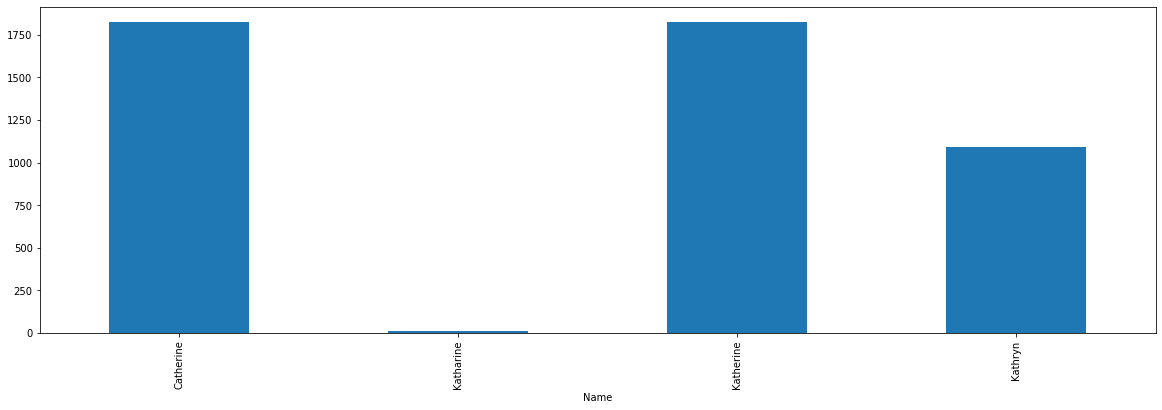

In [84]:
catboy = catman.groupby("Name")["Count"].sum()
catboy.plot(kind = "bar", figsize=(20,6))

# Chart 7

A more in-depth popularity view of AMAB folks named variations of Katherine over time. It was hypothesized that this was perhaps variations of Catherine were more commonly male in the past and migrated to female, as in the case of the name "Ashley", but this was not the case.

In [124]:
catboynames = ["Catherine", "Katharine", "Katherine", "Kathryn"]
    
    
@interact
def groupby(logscale = widgets.Checkbox(value = False)):
    fig, ax = plt.subplots(figsize=(20,20))
    for name in catboynames:
        lineplot = catman.loc[catman["Name"] == name].groupby("Year")["Count"].sum()
        ax.plot(lineplot, label = name)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    if logscale == True:
        plt.yscale('log')
    ax.legend()
    plt.show()

interactive(children=(Checkbox(value=False, description='logscale'), Output()), _dom_classes=('widget-interact…

In [103]:
katname = catname.loc[catname["Name"] == "Katherine"]
#katname

In [95]:
#fig, ax = plt.subplots(figsize=(20,20))
#lineplot1 = katname.loc[catman["Sex"] == "M"].groupby("Year")["Count"].sum()
#ax.plot(lineplot1, label = "Male")
#lineplot2 = katname.loc[catman["Sex"] == "F"].groupby("Year")["Count"].sum()
#ax.plot(lineplot2, label = "Female")
#ax.set_xlabel("Year")
#ax.set_ylabel("Count")
#ax.legend()
#plt.show()

# Chart 8

An in-depth view of the gender assigned at birth for individuals named "Katherine", which was the most popular varient of Catherine for AMAB individuals. 

In [123]:
male = katname.loc[katname["Sex"] == "M"].groupby("Year")["Count"].sum()
female = katname.loc[katname["Sex"] == "F"].groupby("Year")["Count"].sum()

@interact
def groupby(logscale = widgets.Checkbox(value = False)):
    fig, ax = plt.subplots(figsize=(20,6))
    ax.plot(male, label = "Male")
    ax.plot(female, label = "Female")
    ax.set_xlabel("Year")
    ax.set_ylabel("help")
    ax.legend()
    if logscale == True:
        plt.yscale('log')
    plt.show()

interactive(children=(Checkbox(value=False, description='logscale'), Output()), _dom_classes=('widget-interact…

In [127]:
listy = []
for line in dobs:
    line = str(line)
    words = line.split(',')
    listy.append(words)
column_names = ["Name", "Sex", 'Count', "Year"]
bname = pd.DataFrame(listy, columns = column_names)
bname

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


In [134]:
allcounts = bname.groupby("Year")["Count"].sum().values

In [144]:
catname["Year"].values

array([1991, 1994, 1995, ..., 2016, 2017, 2018], dtype=int64)

In [132]:
date = 1880
indexy = 0

for name in allcats:
    usethis = allcounts[indexy]

TypeError: 'DataFrameGroupBy' object is not callable

In [159]:
shortcat = catname.loc[catname["Name"].isin(['Katherine', 'Catherine'])]
shortcat

,Name,Sex,Count,Year
303,Catherine,F,688,1880
304,Catherine,F,635,1881
305,Catherine,F,726,1882
306,Catherine,F,853,1883
307,Catherine,F,874,1884
...,...,...,...,...
1889,Katherine,F,3445,2015
1890,Katherine,M,9,2015
1891,Katherine,F,3271,2016
1892,Katherine,F,2853,2017


In [160]:
catsort = shortcat.sort_values(by=['Year'])

In [175]:
catyearsall = catsort["Year"].values
catyearsall

array([1880, 1880, 1880, 1881, 1881, 1882, 1882, 1883, 1883, 1884, 1884,
       1884, 1885, 1885, 1886, 1886, 1887, 1887, 1887, 1888, 1888, 1888,
       1889, 1889, 1890, 1890, 1891, 1891, 1891, 1891, 1892, 1892, 1893,
       1893, 1893, 1894, 1894, 1895, 1895, 1896, 1896, 1897, 1897, 1898,
       1898, 1898, 1899, 1899, 1899, 1900, 1900, 1900, 1901, 1901, 1901,
       1902, 1902, 1902, 1903, 1903, 1903, 1904, 1904, 1904, 1904, 1905,
       1905, 1906, 1906, 1906, 1907, 1907, 1907, 1907, 1908, 1908, 1908,
       1909, 1909, 1909, 1909, 1910, 1910, 1910, 1911, 1911, 1911, 1911,
       1912, 1912, 1912, 1913, 1913, 1913, 1913, 1914, 1914, 1914, 1914,
       1915, 1915, 1915, 1915, 1916, 1916, 1916, 1916, 1917, 1917, 1917,
       1917, 1918, 1918, 1918, 1918, 1919, 1919, 1919, 1919, 1920, 1920,
       1920, 1920, 1921, 1921, 1921, 1921, 1922, 1922, 1922, 1922, 1923,
       1923, 1923, 1923, 1924, 1924, 1924, 1924, 1925, 1925, 1925, 1925,
       1926, 1926, 1926, 1926, 1927, 1927, 1927, 19

In [169]:
catvaluesall = catsort["Count"].values
catvaluesall

array([  688,   502,     5,   504,   635,   591,   726,   583,   853,
         671,   874,     7,   751,   846,   744,   916,   794,   967,
           5,   893,     6,  1212,  1198,   889,   900,  1232,   803,
        1219,     6,     5,  1333,   961,     5,   963,  1336,   948,
        1430,   968,  1514,  1594,  1047,  1511,   962,   914,  1705,
           5,   942,     5,  1628,  1201,     5,  2081,   890,  1599,
           5,  1896,     5,  1004,  1015,  1916,     5,     9,  1128,
        1983,    11,  2198,  1190,  2230,  1277,     7,  1413,     7,
        2457,     5,    10,  2750,  1430,     7,  2897,  1557,     8,
        3161,  1752,    10,  1858,    11,     5,  3565,  2546,  4666,
          11,  5302,    10,  2794,    12,     8,  3652,  6613,    20,
        8181,    15,  4488,     8,    23,    13,  4801,  8469,    14,
          16,  4956,  8689,    12,  5191,    12,  8842,  8334,  4846,
          11,    17,  8878,    19,    17,  5276,  5156,    17,  8887,
          12,  8538,

In [179]:
percentage = []
allcountsindex = 0
catcountsindex = 0
lastyear = 1880

for year in catyearsall:
    currentyear = int(year)
    if currentyear != lastyear:
        allcountsindex = allcountsindex+1
    secondval = int(allcounts[allcountsindex])
    firstval = int(catvaluesall[catcountsindex])
    perval = firstval/secondval
    perval2 = perval * 100
    percentage.append(perval2)
    lastyear = currentyear
    catcountsindex = catcountsindex +1
percentage

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

# Other things to explore

I'd like to analyze the most common names as a percentage of total babies over the course of time. It seems like there are spikes in Catherine/Katherine, but I realized belatedly that those names might actually remain pretty stable in the population over time, and its just the birthrates are spiking. However, as you can see from the last list I've printed, each name individually makes up such a small percentage of the population that getting a sizable percentage is impossible. I may simply plot birthrate and then use that as a baseline for comparison. It does seem difficult to get birthrates for my entire dataset, but I have found a dataset listing births for the majority of the years I'm looking at: https://www.infoplease.com/us/births/live-births-and-birth-rates-year

As for examining why a name spelling became popular, I'd need to investigate cultural statistics. Which movies were out during a time, which books were popular, how popular they were. I'm struggling to find this information at the moment, but I do have some data on Kathrine Hepburn's filmography (https://www.imdb.com/name/nm0000031/) and award wins (https://www.imdb.com/name/nm0000031/awards?ref_=nm_awd) that may aid me. These aren't datasets by themselves, but I've not yet found a singular table of "this is everything Katherine Hepburn has done". In an ideal world I'd also get the profits or the number of people who came to see each movie, but I'm still looking for that data. I'd also like to try and dig into how popular books and other works of media containing characters named Catherine (like Wuthering Heights) were around relevant times, but I'm struggling to find sales data for these. I'm learning that though we have much data in the world, not all of it is the data we're looking for. 